In [1]:
# # IMPORTS
# astronomy
from astropy.io import fits
# plotting 
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.pyplot as plt
import matplotlib as mpl
# data 
import numpy as np
# file IO
import csv
# my python files 
import match
import v2_AGN_DataAndPlotting as adp
import v2_SED as SED

In [2]:
# get data
f = adp.UnpackTable(adp.path_csv+'\\Completeness.csv')
for k,v in f.items() : 
    f[k] = np.array(v, dtype=float)

print(list(f.keys()))

['Lx_bin_size', 'L6_bin_size', 'Frac_of_IR_IDby_Xray_L6', 'Frac_of_Xray_IDby_IR_Lx', 'Frac_of_Xray_IDby_IR_L6']


In [3]:
def Ax_PlotCompleteness( ax,
        x,              y,
        xlab = '',      ylab = '',
        cb = 'grey',    cy = 'black',
        bhatch = None,  yhatch = None,
    ):
    cbd = adp.darken_color(cb,1.1)
    cyd = adp.darken_color(cy,1.1)
    # get non-nan data
    nanmask = np.ones(y.shape, dtype=bool)
    nanmask[[i for i,yi in enumerate(y) if(np.isnan(yi))]] = False
    xClean = x[nanmask]
    yClean = y[nanmask]
    # plot fraction 
    w = xClean[1]-xClean[0]
    bg = ax.bar(xClean, [1 for _ in yClean],  width=w, color=cb,hatch=bhatch)
    for patch in bg.patches: patch._hatch_color = cbd
    fr = ax.bar(xClean, yClean,               width=w, color=cy,hatch=yhatch)
    for patch in fr.patches: patch._hatch_color = cyd
    # settings
    ax.set_adjustable('box') 
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax.set_ylim([0,1])
    if(yClean[-1] == 0) :
        ax.set_xlim([xClean[0], xClean[-2]])
    else : 
        ax.set_xlim([xClean[0], xClean[-1]])
   
def PlotCompleteness1( x, y, xlab = '', ylab = '', cb = 'grey', cy = 'black', bhatch = None, yhatch = None, save=''):
    # setup plot 
    adp.SetStyle()
    fig, ax = plt.subplots(1,1, sharex=True, figsize=(6, 3),layout='constrained',facecolor='w')
    # plot
    Ax_PlotCompleteness( ax, x, y, xlab, ylab, cb, cy, bhatch, yhatch )
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    # finish 
    if(save): adp.Save(save)
    plt.show()

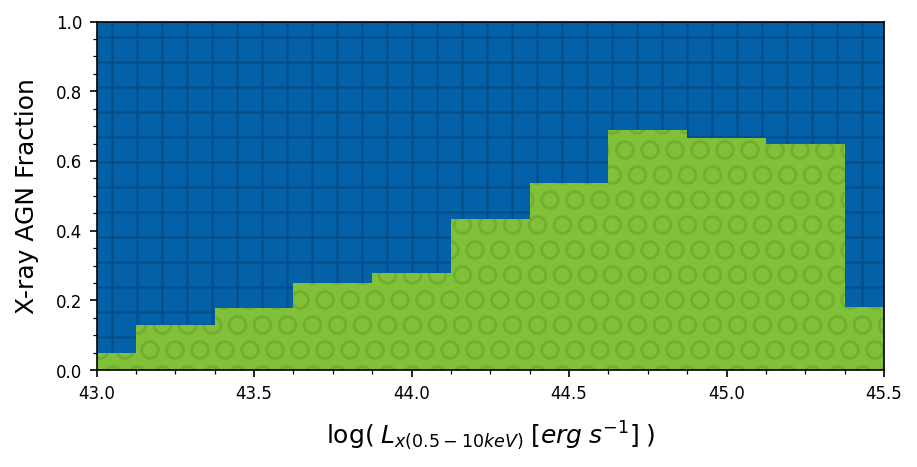

In [4]:
PlotCompleteness1(
    f['Lx_bin_size'],                   f['Frac_of_Xray_IDby_IR_Lx'], 
    '$\log( \; L_{x(0.5-10keV)} \; [erg \; s^{-1}] \;)$',  'X-ray AGN Fraction',
    adp.c_xray,                         adp.c_ir_xray,
    '+',                                'O',
    adp.path_fig+'\\completness_XrayAGN-Lx.pdf'
) # dont need to put this in paper, do double L6um one

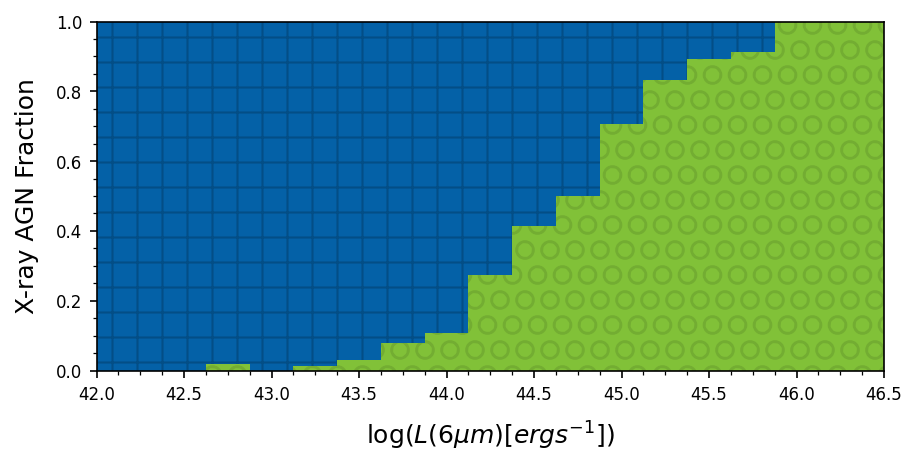

In [5]:
PlotCompleteness1(
    f['L6_bin_size'],                   f['Frac_of_Xray_IDby_IR_L6'], 
    '$\log( L(6\mu m) [erg s^{-1}])$',  'X-ray AGN Fraction',
    adp.c_xray,                         adp.c_ir_xray,
    '+',                                'O',
    adp.path_fig+'\\completness_XrayAGN-L6.pdf'
)

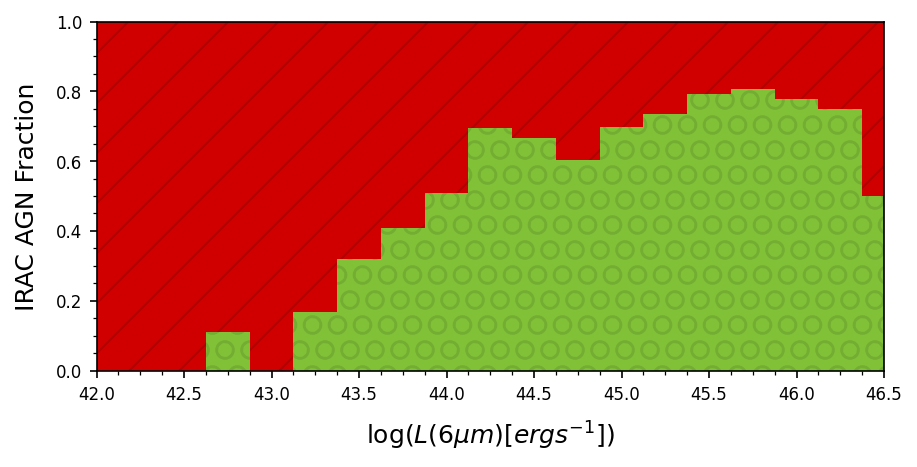

In [6]:
PlotCompleteness1(
    f['L6_bin_size'],                   f['Frac_of_IR_IDby_Xray_L6'], 
    '$\log( L(6\mu m) [erg s^{-1}])$',  'IRAC AGN Fraction',
    adp.c_ir,                           adp.c_ir_xray,
    '/',                                'O',
    adp.path_fig+'\\completness_IRACAGN-L6.pdf'
)

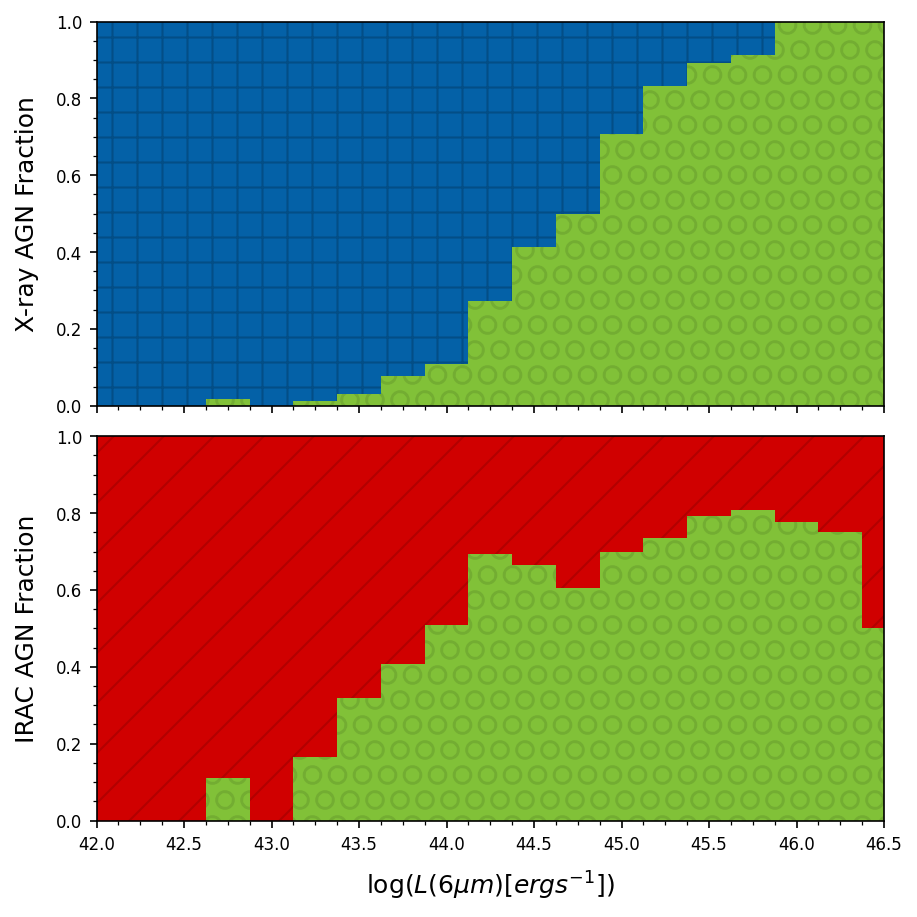

In [7]:
def PlotCompleteness2(f,  save=''):
    # setup plot 
    adp.SetStyle()
    fig, axs = plt.subplots(2,1, sharex=True, figsize=(6, (3*2)),layout='constrained',facecolor='w')
    # plot
    Ax_PlotCompleteness( axs[0],
        f['L6_bin_size'],                   f['Frac_of_Xray_IDby_IR_L6'], 
        '$\log( L(6\mu m) [erg s^{-1}])$',  'X-ray AGN Fraction',
        adp.c_xray,                         adp.c_ir_xray,
        '+',                                'O',
    )
    Ax_PlotCompleteness( axs[1],
        f['L6_bin_size'],                   f['Frac_of_IR_IDby_Xray_L6'], 
        '$\log( L(6\mu m) [erg s^{-1}])$',  'IRAC AGN Fraction',
        adp.c_ir,                           adp.c_ir_xray,
        '/',                                'O',
    )
    # axis settings
    axs[0].set_ylabel('X-ray AGN Fraction')
    axs[1].set_ylabel('IRAC AGN Fraction')
    axs[1].set_xlabel('$\log( L(6\mu m) [erg s^{-1}])$')
    # finish 
    if(save): adp.Save(save)
    plt.show()

PlotCompleteness2(f,adp.path_fig+'\\completness_XrayIRACAGN-L6.pdf') # use this in paper